week08

このたびは千葉県警に新人捜査員として新しく採用され、嬉しく思います。
千葉県内で過去1年間に発生した自転車盗難の状況をまとめたレポートを作成するように、
私は指示されたのでしっかり責務を全うしたいと思います。

In [72]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


➀千葉県の市区町村ごとの自転車盗難件数

In [ ]:
df.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
銚子市          30
酒々井町         30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
九十九里町         3
東庄町           3
神崎町           2
勝浦市           1
御宿町           1
睦沢町           1
白子町           1
dtype: int64

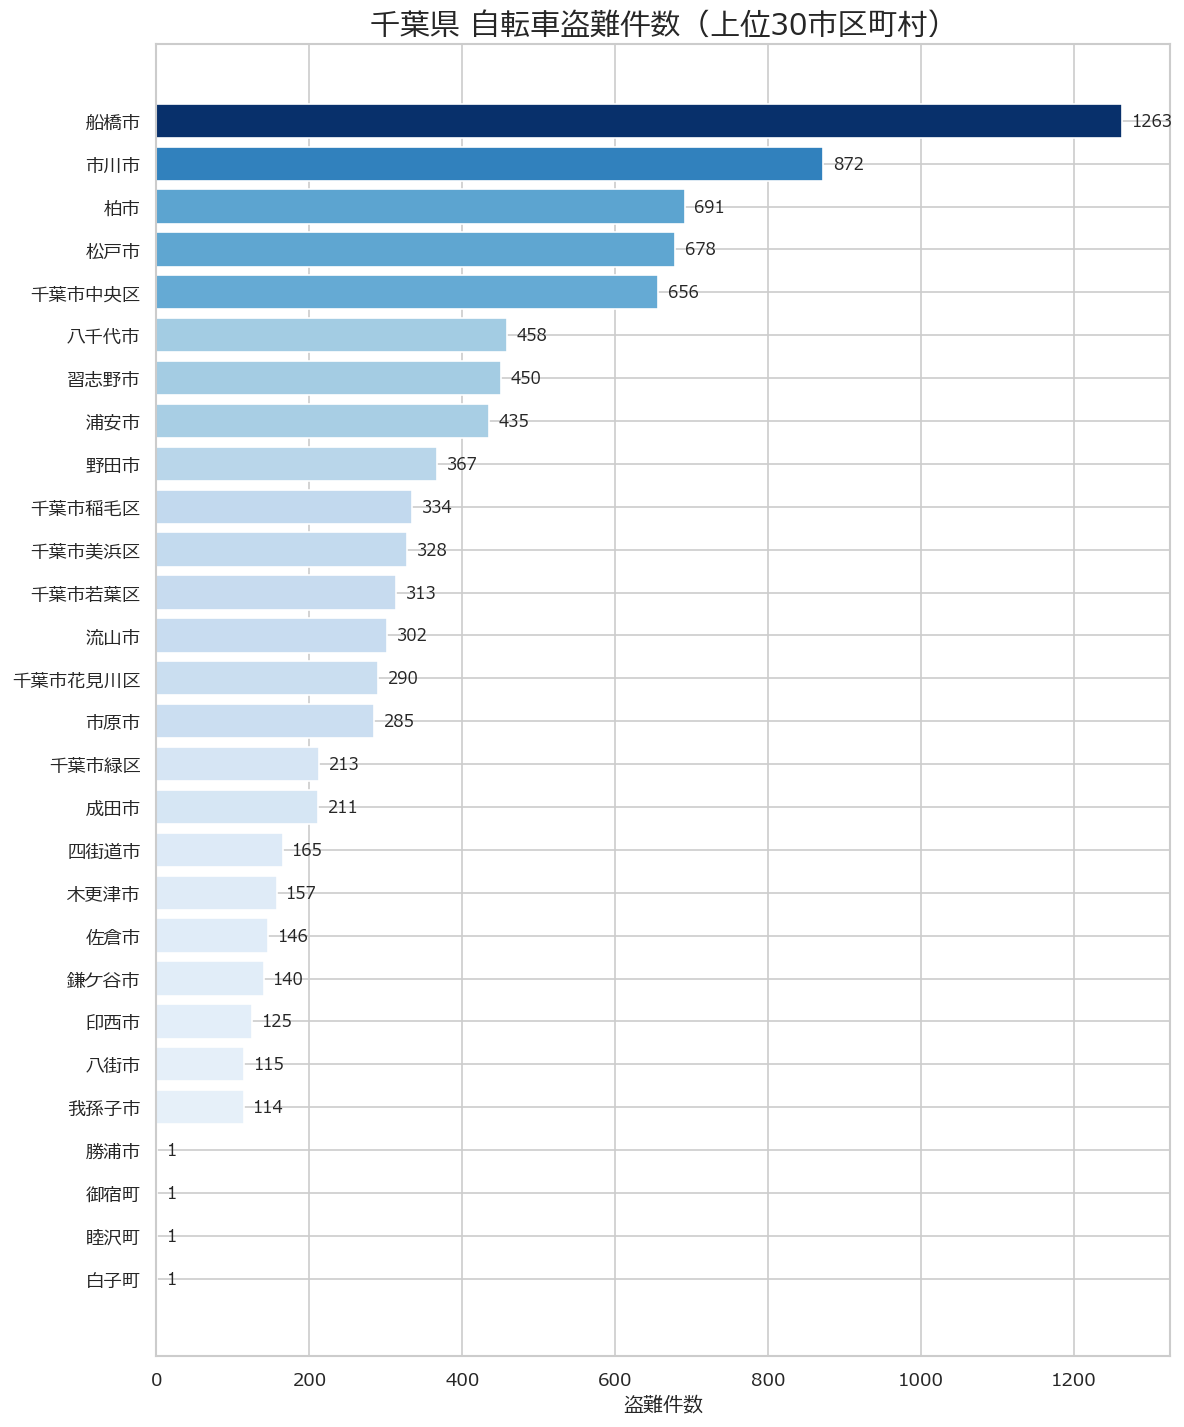

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # pip install squarify
import matplotlib.font_manager as fm

# ===== 日本語フォント（Windows用） =====
plt.rcParams['font.family'] = 'Meiryo'

# ===== データ（必要に応じて追加入力してください）=====
data = pd.Series({
    "船橋市": 1263, "市川市": 872, "柏市": 691, "松戸市": 678, "千葉市中央区": 656,
    "八千代市": 458, "習志野市": 450, "浦安市": 435, "野田市": 367, "千葉市稲毛区": 334,
    "千葉市美浜区": 328, "千葉市若葉区": 313, "流山市": 302, "千葉市花見川区": 290,
    "市原市": 285, "千葉市緑区": 213, "成田市": 211, "四街道市": 165, "木更津市": 157,
    "佐倉市": 146, "鎌ケ谷市": 140, "印西市": 125, "八街市": 115, "我孫子市": 114,
    "勝浦市": 1, "御宿町": 1, "睦沢町": 1, "白子町": 1
})

# 上位30件
top30 = data.sort_values(ascending=False).head(30)

# ========== 図1：水平バー + 密度グラデーション ===============
plt.figure(figsize=(10, 12))
norm = plt.Normalize(top30.min(), top30.max())
colors = plt.cm.Blues(norm(top30.values))

plt.barh(top30.index, top30.values, color=colors)
plt.title("千葉県 自転車盗難件数（上位30市区町村）", fontsize=18)
plt.xlabel("盗難件数")

# 値を右側に表示
for i, v in enumerate(top30.values):
    plt.text(v + max(top30.values) * 0.01, i, str(v), va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


わかりやすく棒グラフで表しました。また、件数の多さにより、色の濃さを変えることで見やすくしました。

⊡上位・下位の傾向分析

上位5件: 船橋市、市川市、柏市、松戸市、千葉市中央区 → 人口が多く、自転車利用率も高いと思われる。

下位4件: 勝浦市、御宿町、睦沢町、白子町 → 過疎地や住宅密度が低い場所で発生が少ない。

⊡考察・傾向

自転車盗難件数は都市部に集中している。

人口密度、駅周辺商業施設の多さなどが影響していると思われる。

➁千葉県の時間帯別の自転車盗難発生件数

In [ ]:
df.groupby('発生時（始期）').size().sort_values(ascending=False)

発生時（始期）
7     919
18    875
17    859
16    695
8     675
19    606
12    508
20    500
15    473
10    433
21    413
9     411
13    390
14    388
11    371
6     333
22    311
23    229
0     167
不明    115
5     113
1      74
2      32
4      30
3      23
dtype: int64

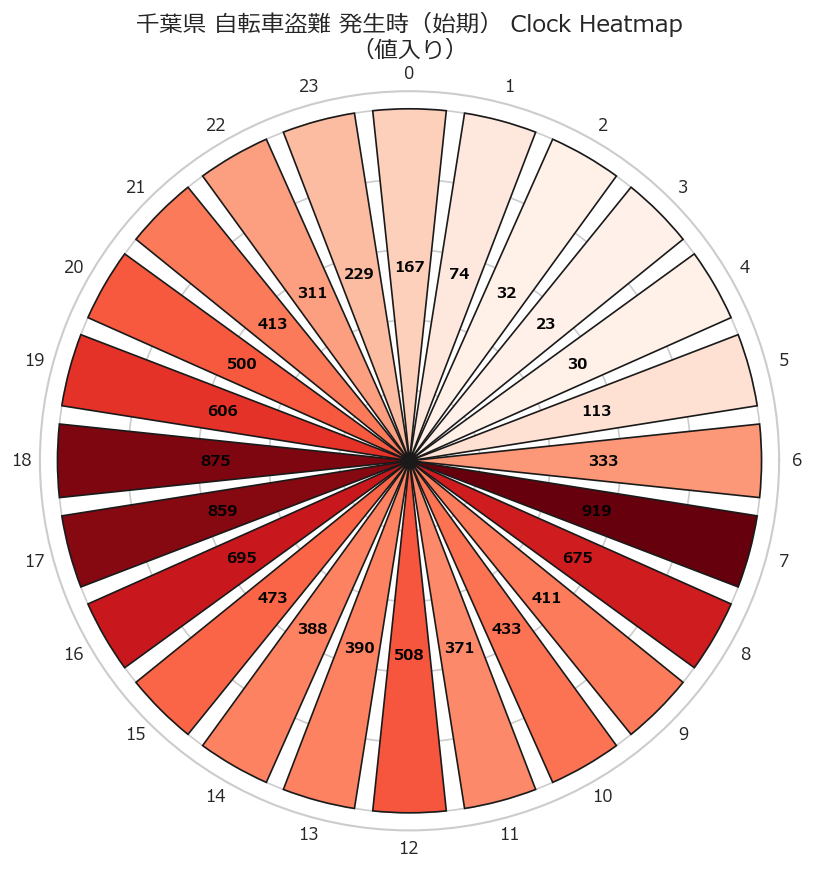

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------
# データ入力
# -----------------------------
data = {
    0: 167, 1: 74, 2: 32, 3: 23, 4: 30, 5: 113, 6: 333,
    7: 919, 8: 675, 9: 411, 10: 433, 11: 371, 12: 508, 13: 390,
    14: 388, 15: 473, 16: 695, 17: 859, 18: 875, 19: 606,
    20: 500, 21: 413, 22: 311, 23: 229, "不明": 115
}

# 「不明」を除外して扱う
data_filtered = {k: v for k, v in data.items() if k != "不明"}
s = pd.Series(data_filtered).sort_index()

# -----------------------------
# 時計型ヒートマップ作成
# -----------------------------
hours = s.index
counts = s.values

# 時計の角度（12時が上）
theta = np.array(hours) / 24 * 2 * np.pi
theta = np.pi/2 - theta  # 12時を上にする

# 放射方向の長さは固定（半径1）
r = np.ones_like(theta)

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# カラーマップで色分け
colors = counts / counts.max()  # 0-1に正規化
ax.bar(theta, r, width=2*np.pi/24*0.8, bottom=0, color=plt.cm.Reds(colors), edgecolor='k')

# 時計の時間ラベル
for i, hour in enumerate(hours):
    angle = theta[i]
    ax.text(angle, 1.10, str(hour), ha='center', va='center', fontsize=10)

# ★ ここで「数値」を追加表示
for i, value in enumerate(counts):
    angle = theta[i]
    ax.text(angle, 0.55, str(value), ha='center', va='center', fontsize=9, color='black', fontweight='bold')

# タイトル
plt.title("千葉県 自転車盗難 発生時（始期） Clock Heatmap\n（値入り）", fontsize=14, pad=20)

# r軸非表示
ax.set_yticklabels([])
ax.set_xticks([])

plt.show()


24時間の時間別の件数がわかりやすいように円グラフで24個に分けて表しました。
件数が多いものは色を濃くして、見やすくしました。

⊡分布の分析

ピーク時間帯:
7時（朝の通勤・通学前） → 919件
17～18時（帰宅時間帯） → 859件、875件
16時、19時も比較的多い（屋外で自転車を利用する時間帯と一致）

低発生時間帯:
深夜帯（0～5時） → 167件以下
特に2～4時は非常に少ない（32件、23件、30件）
夜間は人通りが少ないため盗難件数も減少

⊡考察

朝のピークは通勤・通学で駐輪場に自転車を停める時間帯に発生しやすいと思われる。

夕方のピークは帰宅時や短時間外出で自転車を利用する時間帯であり、
深夜帯の件数は少ないが、住宅街や無人駐輪場ではまれに発生すると思われる。


➂千葉県の自転車盗難時の施錠状況

In [ ]:
df.groupby('施錠関係').size()

施錠関係
施錠した    3162
施錠せず    6781
dtype: int64

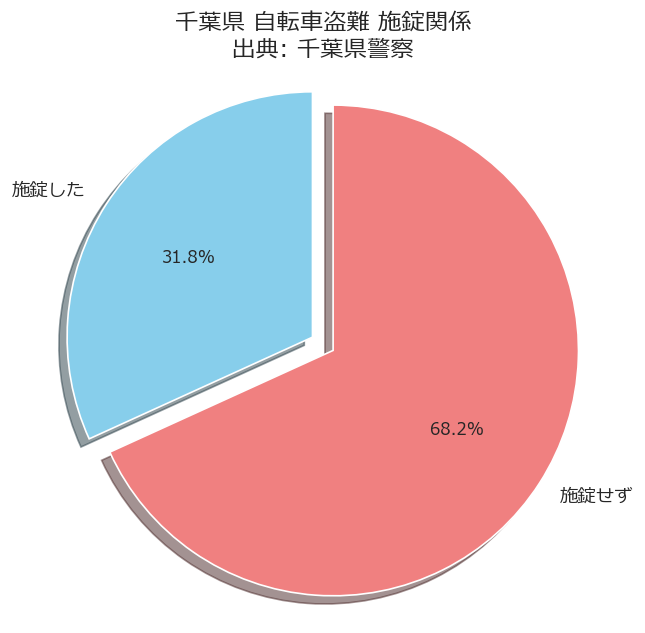

In [ ]:
import matplotlib.pyplot as plt

# -----------------------------
# データ入力
# -----------------------------
data = {"施錠した": 3162, "施錠せず": 6781}

# ラベルと値
labels = list(data.keys())
sizes = list(data.values())

# 色と強調（施錠していない方を少し強調）
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # 施錠せずを少し突出

# -----------------------------
# 円グラフ作成
# -----------------------------
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title("千葉県 自転車盗難 施錠関係\n出典: 千葉県警察", fontsize=14)
plt.axis('equal')  # 円を正円にする

plt.show()


情報が二択だったので、２色に分けて円グラフでわかりやすく表しました。

⊡分析

施錠していない自転車が圧倒的に多い（約68%）
→ 自転車盗難は施錠の有無が被害リスクに大きく影響している。

施錠していた場合でも盗難されるケースがある（約32%）
→ 施錠方法やロックの種類によって防げなかった可能性があり、特にワイヤーロックや古い鍵は破られやすい。

⊡考察

未施錠の自転車を減らすことで盗難件数を大幅に減少することができる。

施錠しても盗まれる件数があるため、頑丈なロックや二重ロックが必要であると思う。

麗澤大学のような防犯カメラの設置をすることが発生率を減少させると思う。

➃千葉県の年月日別の自転車盗難件数

In [ ]:
df['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format="%Y%m%d", errors='coerce')
df['月'] = df['発生日'].dt.month
df.groupby('月').size()

月
1.0      620
2.0      569
3.0      681
4.0      761
5.0      813
6.0      826
7.0     1027
8.0      943
9.0      984
10.0     956
11.0     888
12.0     782
dtype: int64

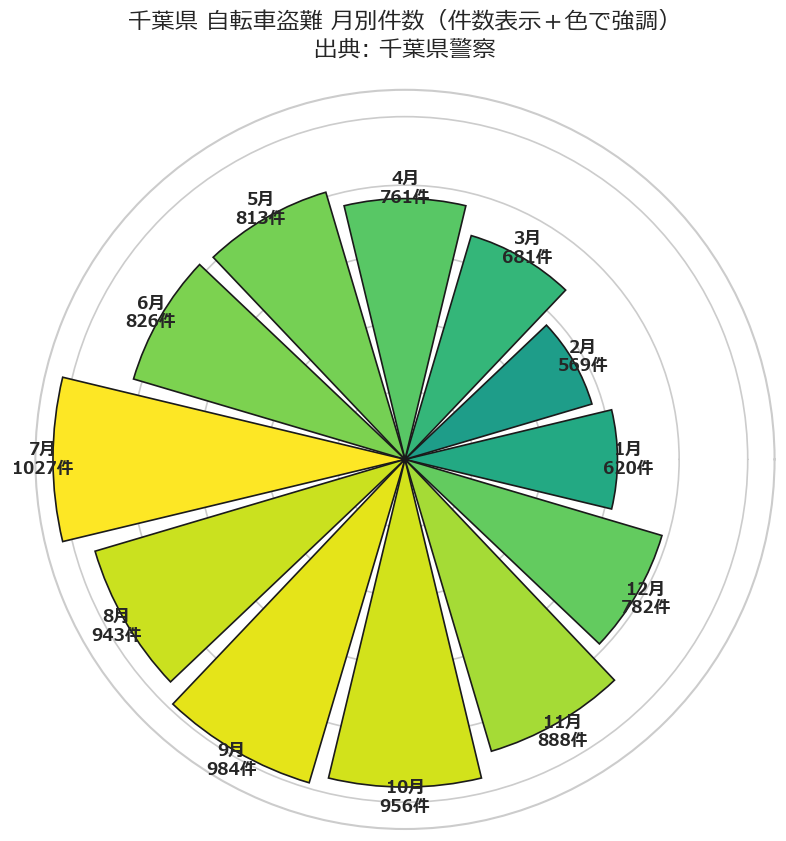

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------
# データ入力
# -----------------------------
data = {
    1: 620, 2: 569, 3: 681, 4: 761, 5: 813, 6: 826,
    7: 1027, 8: 943, 9: 984, 10: 956, 11: 888, 12: 782
}

s = pd.Series(data)

months = s.index
counts = s.values

# -----------------------------
# 円形レーダー用角度
# -----------------------------
theta = np.linspace(0, 2*np.pi, len(months), endpoint=False)
radii = counts
width = 2*np.pi/len(months) * 0.9  # 月ごとのバー幅

# -----------------------------
# 描画
# -----------------------------
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# 色を件数に応じて濃くする
colors = plt.cm.viridis(radii / max(radii))
bars = ax.bar(theta, radii, width=width, bottom=0, color=colors, edgecolor='k')

# 月ラベルと件数表示
for t, rad, m, c in zip(theta, radii, months, counts):
    ax.text(t, rad + 30, f"{m}月\n{c}件", ha='center', va='center', fontsize=10, fontweight='bold')

# タイトル
plt.title("千葉県 自転車盗難 月別件数（件数表示＋色で強調）\n出典: 千葉県警察", fontsize=14, pad=20)

# r軸非表示
ax.set_yticklabels([])
ax.set_xticks([])

plt.show()


円グラフで色別に分けたのと件数が多いものを大きくすること・数値を表示することで見やすくしました。

⊡分布の分析

春〜夏にかけて増加している

5～8月（813～1,027件） → 学生の長期休暇、外出増加、気候が良い季節

冬に向けて減少している

11～2月（888～569件） → 寒くなり外出や自転車利用が減少

季節性の傾向の傾向がある

ピークは夏（7月）

最少は冬（2月）

⊡考察

春〜夏に盗難件数が増加していて、学生の長期休暇や旅行などで自転車が放置されやすいからだと思われる。

冬は件数が減少していて、外出や自転車利用自体が減ることと気温低下も影響していると思われる。

In [ ]:
pip install pandas matplotlib seaborn requests chardet


   ---------------------------------------- 0/2 [chardet]
   ---------------------------------------- 0/2 [chardet]
   ---------------------------------------- 0/2 [chardet]
   ---------------------------------------- 0/2 [chardet]
   ---------------------------------------- 0/2 [chardet]
   ---------------------------------------- 0/2 [chardet]
   ---------------------------------------- 0/2 [chardet]
   ---------------------------------------- 0/2 [chardet]
   ---------------------------------------- 0/2 [chardet]
   -------------------- ------------------- 1/2 [seaborn]
   -------------------- ------------------- 1/2 [seaborn]
   -------------------- ------------------- 1/2 [seaborn]
   -------------------- ------------------- 1/2 [seaborn]
   -------------------- ------------------- 1/2 [seaborn]
   -------------------- ------------------- 1/2 [seaborn]
   -------------------- ------------------- 1/2 [seaborn]
   -------------------- ------------------- 1/2 [seaborn]
   ----------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


⓹千葉県の被害者職業別の自転車盗難件数

In [ ]:
import csv
import collections

# CSV ファイルのパス
csv_path = "jitensha.csv"

# 被害者の職業ごとの件数を格納する Counter
occupation_counts = collections.Counter()

with open(csv_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # CSV の列名に合わせてください（オープンデータでは「被害者の職業」など）
        occ = row["被害者の職業"]
        occupation_counts[occ] += 1

# 結果を出力
print("被害者職業別件数（自転車盗）:")
for occ, count in occupation_counts.items():
    print(f"{occ}: {count}")


被害者職業別件数（自転車盗）:
大学生: 1612
中学生: 886
その他: 4968
高校生: 2208
小学生: 239
法人・団体、被害者なし: 30


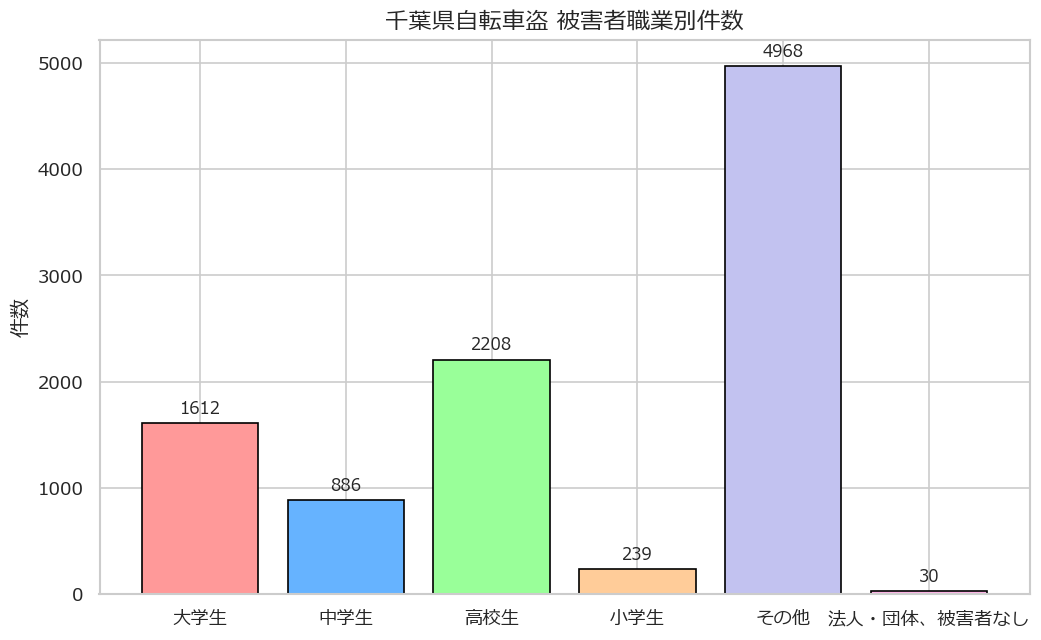

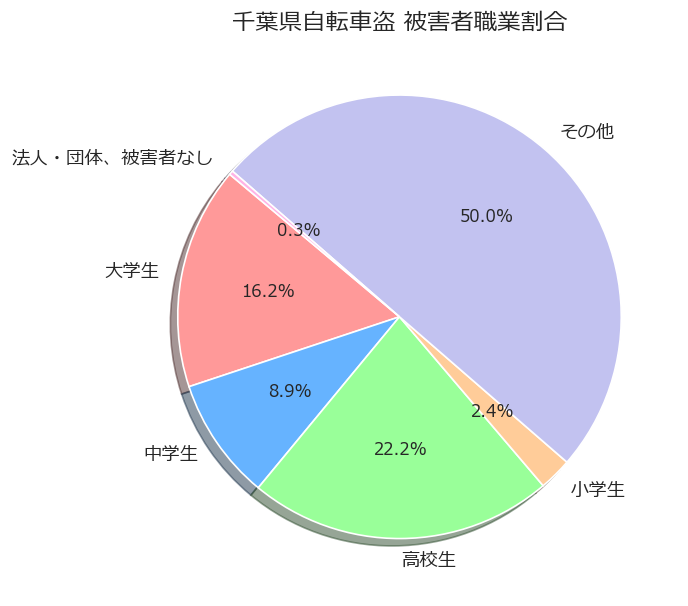

In [ ]:
import matplotlib.pyplot as plt

# データ
occupations = ['大学生', '中学生', '高校生', '小学生', 'その他', '法人・団体、被害者なし']
cases = [1612, 886, 2208, 239, 4968, 30]

# 色をカスタマイズ（オリジナリティを出す）
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# 図のサイズ
plt.figure(figsize=(10,6))

# 棒グラフを作成
bars = plt.bar(occupations, cases, color=colors, edgecolor='black')

# 数値ラベルを棒の上に表示
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom', fontsize=10)

# タイトルと軸ラベル
plt.title('千葉県自転車盗 被害者職業別件数', fontsize=14)
plt.ylabel('件数', fontsize=12)

# 円グラフも併用して全体割合を表示
plt.figure(figsize=(6,6))
plt.pie(cases, labels=occupations, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('千葉県自転車盗 被害者職業割合', fontsize=14)

plt.show()


棒グラフで数値、円グラフで割合を表し、わかりやすくしました。
また、同じ情報の色を合わせることで、見やすくしました。

⊡分布の分析

学生の被害が多く、高校生（22.2%）と大学生（16.2%）を合わせると約38%

「その他」が最も多い（50%）

社会人や無職、主婦など、詳細不明も含むので、日常生活で自転車利用が多い層が中心

⊡考察

学生の盗難リスクが高く、通学・通学路での駐輪中に盗まれるケースが多いと思われる。
また、高校生や大学生は放課後や夜間も外出するため被害リスクが増得ると思われる。

日常利用者（その他）が最も多く、社会人や主婦など、日常生活で自転車を頻繁に使用するからだと思われる。


⓺千葉県の被害者年齢別の自転車盗難件

In [ ]:
import csv
import collections
import sys

def aggregate_age_counts(csv_path: str, age_field: str = "被害者の年齢") -> collections.Counter:
    """
    CSVファイルから被害者年齢ごとの件数を集計します。

    :param csv_path: CSV ファイルのパス（ここでは "jitensha.csv"）
    :param age_field: 年齢が記載されている列名
    :return: 年齢ごとの件数を格納した Counter
    """
    counts = collections.Counter()
    with open(csv_path, mode="r", encoding="utf-8", newline="") as f:
        reader = csv.DictReader(f)
        if age_field not in reader.fieldnames:
            print(f"エラー：列名 '{age_field}' が見つかりません。CSV列名：{reader.fieldnames}", file=sys.stderr)
            sys.exit(1)
        for row in reader:
            age = row.get(age_field, "").strip()
            if age == "":
                age = "不明"
            counts[age] += 1
    return counts

def main():
    csv_path = "jitensha.csv"
    age_field = "被害者の年齢"
    counts = aggregate_age_counts(csv_path, age_field)
    print("被害者年齢別 件数（自転車盗）:")
    for age, cnt in sorted(counts.items(), key=lambda x: (x[0] if x[0] != "不明" else "", x[1])):
        print(f"{age}: {cnt}")

if __name__ == "__main__":
    main()


被害者年齢別 件数（自転車盗）:
10歳代: 4342
10歳未満: 64
20歳代: 2693
30歳代: 986
40歳代: 751
50歳代: 537
60-64歳: 166
65-69歳: 88
70歳以上: 286
法人・団体、被害者なし: 30


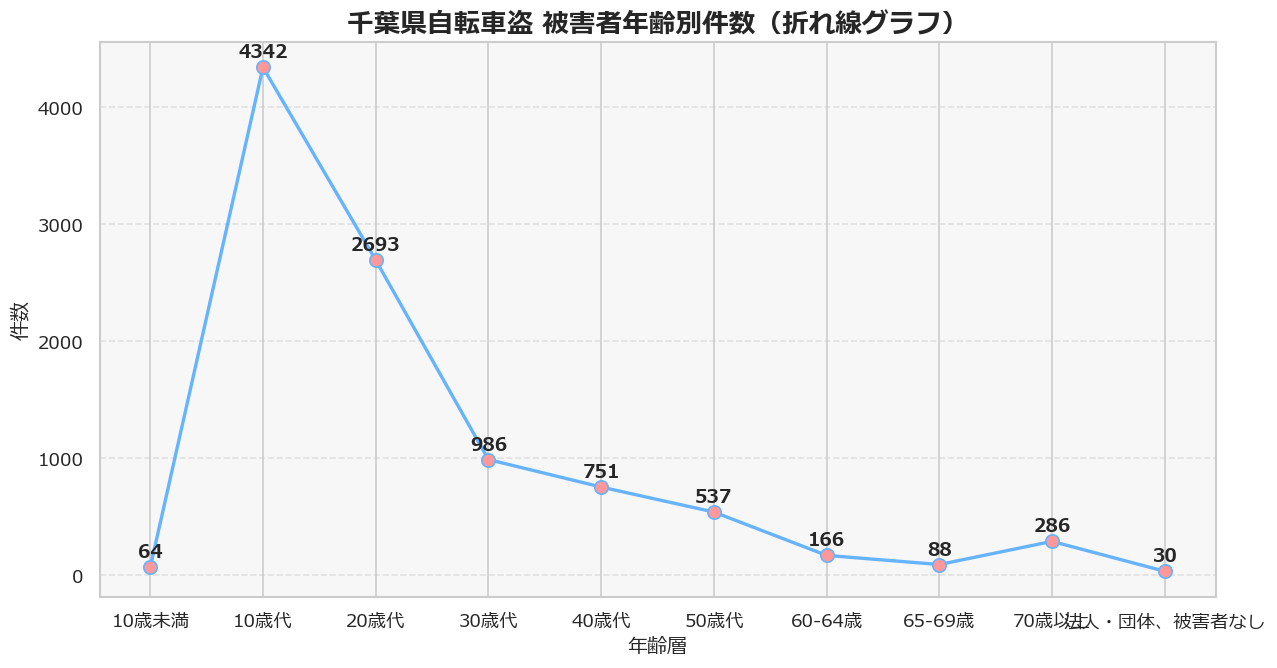

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# データ
age_groups = ['10歳未満', '10歳代', '20歳代', '30歳代', '40歳代', '50歳代', '60-64歳', '65-69歳', '70歳以上', '法人・団体、被害者なし']
cases = [64, 4342, 2693, 986, 751, 537, 166, 88, 286, 30]

# 折れ線グラフ
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(age_groups, cases, marker='o', linestyle='-', linewidth=2, markersize=8, color='#66b3ff', markerfacecolor='#ff9999')

# 各点に件数ラベルを表示
for i, value in enumerate(cases):
    ax.text(i, value + 50, f'{value}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# タイトルと軸ラベル
ax.set_title('千葉県自転車盗 被害者年齢別件数（折れ線グラフ）', fontsize=16, fontweight='bold')
ax.set_ylabel('件数', fontsize=12)
ax.set_xlabel('年齢層', fontsize=12)

# 背景グリッド
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#f7f7f7')

plt.show()


折れ線グラフにすることで、年齢別の数値がわかりやすくしました。

⊡分布の分析

被害者の多くは若年層であり、10歳代（43.6%）と20歳代（27.1%）で全体の約70%を占めていて、
通学・通勤や外出の頻度が高い層が中心であり、中年層の被害は少なめ

高齢者の被害は少ない

⊡考察

若年層が圧倒的に被害に遭いやすく、通学・通勤や部活・アルバイトなど外出機会が多いからだと思われる。

高齢者の被害は少なく、60歳以上で約5.5%であり、自転車利用自体が減るため被害件数が低いと思われる。

⊡まとめ

千葉県の自転車盗難は、都市部の朝夕に若年層が利用する自転車で、
施錠していないケースが最も被害に遭いやすい傾向がある。
季節・年齢・地域・施錠状況を組み合わせた防犯施策が効果的であると思います。